# This notebook can be run to sample SILVR directly

In [1]:
from silvr_demo import * 
import nglview as nv

# Reference coordinates

Users can write their own sxyz file here. This takes a very similar form to an XYZ file.

`First line` - total number of atoms in the file

`Second line` - experiment setup information. Dummy atoms refer to atoms that are not mapped to a reference atom. These are added at run time. This feature is unstable. Samples normally defines the total number of samples to take, however in this demo sampling is fixed to n=1. The comment then holds any useful information, in this case the fragments used to create this file are listed.

`Third line onwards` - element, XYZ coordinates, and silvr rate. The silvr rate value can be any value `0 < silvr rate < 1`. In general `rate = 0.005` gives weak similarity and high diversity, `rate = 0.01` gives high similarity and lower diversity. Values of rate greater than 0.01 tend to be unstable. 

In [2]:
#This experiment file is the same as in exp_25

reference_file = """31
dummy:0 samples:1 comment:Mpro-x0072_0A and Mpro-x0354_0A
C 6.565000 -5.040000 26.574000 0.005
C 9.451000 -3.115000 24.169000 0.005
C 9.351000 -1.831000 23.357000 0.005
C 10.748000 -1.232000 23.404000 0.005
C 11.059000 -0.192000 24.271000 0.005
C 12.351000 0.308000 24.296000 0.005
C 13.328000 -0.245000 23.484000 0.005
C 13.014000 -1.293000 22.628000 0.005
C 11.724000 -1.783000 22.597000 0.005
N 8.196000 -3.620000 24.664000 0.005
O 9.210000 -5.539000 26.160000 0.005
O 8.777000 -3.612000 27.202000 0.005
S 8.227000 -4.451000 26.151000 0.005
C 13.279000 -1.110000 22.551000 0.005
C 7.346000 2.688000 29.320000 0.005
C 6.134000 2.589000 29.975000 0.005
C 5.628000 3.702000 30.845000 0.005
C 5.404000 1.427000 29.813000 0.005
C 5.859000 0.384000 29.020000 0.005
C 11.775000 -0.177000 24.186000 0.005
C 11.066000 -0.452000 25.490000 0.005
C 10.725000 -2.763000 24.771000 0.005
C 11.499000 -2.435000 23.512000 0.005
C 8.841000 -1.493000 25.784000 0.005
C 8.429000 -0.247000 26.557000 0.005
C 7.074000 0.503000 28.364000 0.005
C 7.822000 1.666000 28.515000 0.005
N 12.482000 -1.377000 23.748000 0.005
N 10.120000 -1.564000 25.357000 0.005
O 8.009000 -2.377000 25.574000 0.005
O 7.503000 -0.545000 27.591000 0.005"""#Make sure the """ is on this line

# Sample SILVR

In [3]:
sample_silvr(reference_file)

Entropy of n_nodes: H[N] -3.718651056289673
alphas2 [9.99990000e-01 9.99988000e-01 9.99982000e-01 ... 2.59676966e-05
 1.39959211e-05 1.00039959e-05]
gamma [-11.51291546 -11.33059532 -10.92513058 ...  10.55863126  11.17673063
  11.51251595]
Total sampling time:  39.221710443496704  seconds


[22:40:33] Running Uncharger
[22:40:33] Removed negative charge.
[22:40:33] Removed negative charge.


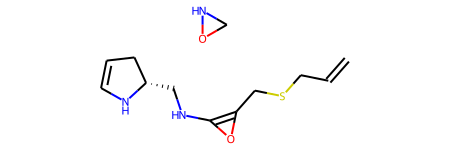

In [4]:
mol = get_mol()
Chem.MolFromSmiles(Chem.MolToSmiles(mol))

# Display sample

In [7]:
view = nv.show_file("docking_oe/mpro_unbound.pdb")
view.add_component(mol)

#Show protein surface and make white
view[0].clear_representations()
view[0].add_surface(selection="protein", color="white")

#Show sample as licorice
view[1].clear_representations()
view[1].add_licorice(sele="NOT _H", radius=0.2)

#Rotate view so sample can be seen
view[1].center()
view.control.spin([0, 1, 0], 4.4)
view.control.spin([1, 0, 0], -0.35)

#Hide protein: view[0].hide()
#show protein: view[0].show()

#Because of relative sizes of components, it may appear like there is protein-ligand clash when there is not. 

In [8]:
view

NGLWidget()